### Import des bibliothéques
---

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

###  Chargement des données
---

In [2]:
df = pd.read_csv("../data/conversion_data_train.csv", encoding="latin-1")
df.head()

country  age  new_user  source  total_pages_visited  converted
0    China   22         1  Direct                    2          0
1       UK   21         1     Ads                    3          0
2  Germany   20         0     Seo                   14          1
3       US   23         1     Seo                    3          0
4       US   28         1  Direct                    3          0

### L'EDA Analyse exploratoire des données Basique
---

In [3]:
print(f"Nous avons {df.shape[1]} colonnes et {df.shape[0]} lignes dans ce jeu de données")

print("\n... Informations sur les colonnes et les types de données ...")
df.info() 

print("\n... Statistiques descriptives sur les colonnes numériques ...")
display(df.describe())

print("\n... Valeurs manquantes ...")
nb_valeurs_manquantes = df.isnull().sum()
pourcentage_valeurs_manquantes = (df.isnull().mean() * 100).round(2)
df_manquants = pd.DataFrame({
    'Nombre de Valeurs Manquantes': nb_valeurs_manquantes,
    '% Valeurs Manquantes': pourcentage_valeurs_manquantes
})
# Ne garder que les colonnes avec des valeurs manquantes
df_manquants[df_manquants['Nombre de Valeurs Manquantes'] > 0].sort_values('Nombre de Valeurs Manquantes', ascending=False)
print(df_manquants)

Nous avons 6 colonnes et 284580 lignes dans ce jeu de données

... Informations sur les colonnes et les types de données ...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284580 entries, 0 to 284579
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              284580 non-null  object
 1   age                  284580 non-null  int64 
 2   new_user             284580 non-null  int64 
 3   source               284580 non-null  object
 4   total_pages_visited  284580 non-null  int64 
 5   converted            284580 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 13.0+ MB

... Statistiques descriptives sur les colonnes numériques ...


age       new_user  total_pages_visited      converted
count  284580.000000  284580.000000        284580.000000  284580.000000
mean       30.564203       0.685452             4.873252       0.032258
std         8.266789       0.464336             3.341995       0.176685
min        17.000000       0.000000             1.000000       0.000000
25%        24.000000       0.000000             2.000000       0.000000
50%        30.000000       1.000000             4.000000       0.000000
75%        36.000000       1.000000             7.000000       0.000000
max       123.000000       1.000000            29.000000       1.000000


... Valeurs manquantes ...
                     Nombre de Valeurs Manquantes  % Valeurs Manquantes
country                                         0                   0.0
age                                             0                   0.0
new_user                                        0                   0.0
source                                          0                   0.0
total_pages_visited                             0                   0.0
converted                                       0                   0.0


### Reduction du jeu de Données
---

In [4]:
# Le dataset est important, création d'un échantillon
df_sample = df.sample(10000)

### L'EDA Analyse exploratoire des données Approfondie
---

--- Target 'Converted' ---

converted
0    275400
1      9180
Name: count, dtype: int64

Le dataset est fortement déséquilibré : seulement 3 % des utilisateurs ont converti.
 0 → non convertis : 275400
 1 → convertis : 9180 


--- Distribution 'country' --- 



--- Distribution 'Age' --- 



--- Distribution 'new_user' --- 



--- Distribution 'source' --- 



--- Distribution 'total_pages_visited' --- 



--- Conclusion Distribution ---
Quatre pays sont représentés, mais de manière déséquilibrée : les États-Unis sont majoritaires, suivis par la Chine.
La plus forte concentration d’utilisateurs se situe entre 20 et 40 ans.
La catégorie 'new_user = 1' est prédominante.
Trois sources de trafic sont présentes, avec une dominance pour SEO.
Le nombre de pages visitées varie de 1 à 29.

 --- Variables vs Converted --- 



Les États-Unis sont majoritaires, donc la plupart des utilisateurs viennent de là.
 Néamoins, leur tx de conversion moy est plus faible (<0.04) que l'Allemagne (>0.05) qui réprésente peu d'utilisateurs



La source Ads n’est pas la plus représentée parmi les utilisateurs, mais elle a un taux de conversion supérieur à 4 %. 
À l’inverse, la source SEO, qui est majoritaire, n’atteint qu’un taux de conversion d’environ 3 %.




 Nous observons des outliers sur les ages




 Plus les pages sont visitée, plus il y de conversion

--- Matrice de corrélation ----


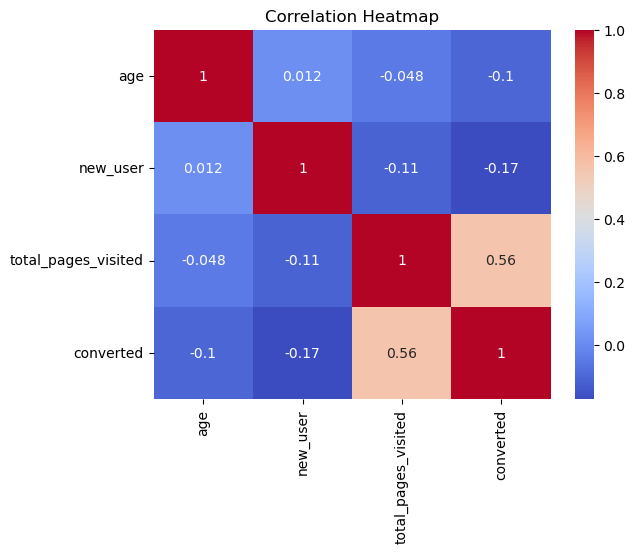

 
 La variable la plus corrélée avec la target est 'total_pages_visited


In [6]:
# Analyse Target Converted
print("--- Target 'Converted' ---\n")
print(df['converted'].value_counts())

print("\nLe dataset est fortement déséquilibré : seulement 3 % des utilisateurs ont converti."
      "\n 0 → non convertis : 275400"
      "\n 1 → convertis : 9180 \n")

# Visualisation distribution des variables
print("\n--- Distribution 'country' --- \n")
fig = px.histogram(
    df_sample,
    x='country',
    title="Distribution Country"
)
fig.show()

print("--- Distribution 'Age' --- \n")
fig = px.histogram(
    df_sample,
    x='age',
    nbins=50,
    title="Distribution Age"
)
fig.show()

print("--- Distribution 'new_user' --- \n")
fig = px.histogram(
    df_sample,
    x=df['new_user'].astype(str),
    title="Distribution New_user"
)
fig.show()

print("--- Distribution 'source' --- \n")
fig = px.histogram(
    df_sample,
    x='source',
    nbins=50,
    title="Distribution Source "
)
fig.show()

print("--- Distribution 'total_pages_visited' --- \n")
fig = px.histogram(
    df_sample,
    x='total_pages_visited',
    nbins=50,
    title="Distribution Total_pages_visited"
)
fig.show()

print("--- Conclusion Distribution ---"
    "\nQuatre pays sont représentés, mais de manière déséquilibrée : "
    "les États-Unis sont majoritaires, suivis par la Chine."
    "\nLa plus forte concentration d’utilisateurs se situe entre 20 et 40 ans."
    "\nLa catégorie 'new_user = 1' est prédominante."
    "\nTrois sources de trafic sont présentes, avec une dominance pour SEO."
    "\nLe nombre de pages visitées varie de 1 à 29.\n"
)

# Visualisation des variables par rapport au taux de conversion (Cible)
print(" --- Variables vs Converted --- ")
# Impact du pays sur la conversion
fig = px.bar(
    df_sample.groupby('country', as_index=False)['converted'].mean(),
    x='country',
    y='converted',
    title="Taux de conversion moyen par pays"
)
fig.show()

print("\nLes États-Unis sont majoritaires, donc la plupart des utilisateurs viennent de là."
      "\n Néamoins, leur tx de conversion moy est plus faible (<0.04) que l'Allemagne (>0.05) qui réprésente peu d'utilisateurs")

# Impact du type d’utilisateur
fig = px.bar(
    df_sample.groupby('new_user', as_index=False)['converted'].mean(),
    x='new_user',
    y='converted',
    title="Taux de conversion moyen selon New User"
)
fig.show()


# Impact de la source de trafic
fig = px.bar(
    df_sample.groupby('source', as_index=False)['converted'].mean(),
    x='source',
    y='converted',
    title="Taux de conversion moyen par Source"
)
fig.show()
print("\nLa source Ads n’est pas la plus représentée parmi les utilisateurs, mais elle a un taux de conversion supérieur à 4 %."
" \nÀ l’inverse, la source SEO, qui est majoritaire, n’atteint qu’un taux de conversion d’environ 3 %.\n")

# Age vs Conversion
fig = px.box(
    df_sample,
    x='converted',
    y='age',
    title="Répartition des âges selon la conversion"
)
fig.show()
print("\n Nous observons des outliers sur les ages\n")

# Pages visitées vs Conversion
fig = px.box(
    df_sample,
    x='converted',
    y='total_pages_visited',
    title="Pages visitées selon la conversion"
)
fig.show()
print("\n Plus les pages sont visitée, plus il y de conversion\n")

# Matrice de corrélation
print("--- Matrice de corrélation ----")
correlation = df_sample.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

print(" \n La variable la plus corrélée avec la target est 'total_pages_visited")



Données déséquilibrées : la majorité des utilisateurs ne s’abonne pas → attention aux métriques.